In [1]:
from pyvis.network import Network
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from collections import deque



In [2]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U nbformat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyvis


Note: you may need to restart the kernel to use updated packages.


# Tree 2d เพิ่มเติม


กรอกเส้นเชื่อมในรูปแบบ: u v w

====== เลือกเมนู ======
1. แสดงกราฟทั้งหมด
2. DFS Spanning Tree
3. BFS Spanning Tree
4. Dijkstra Shortest Path
5. Prim Minimum Spanning Tree
6. Kruskal Minimum Spanning Tree
0. ออกจากโปรแกรม
Prim MST: [(1, 3, 2), (3, 2, 1), (2, 4, 4)]
👉 Total weight of Prim MST = 7


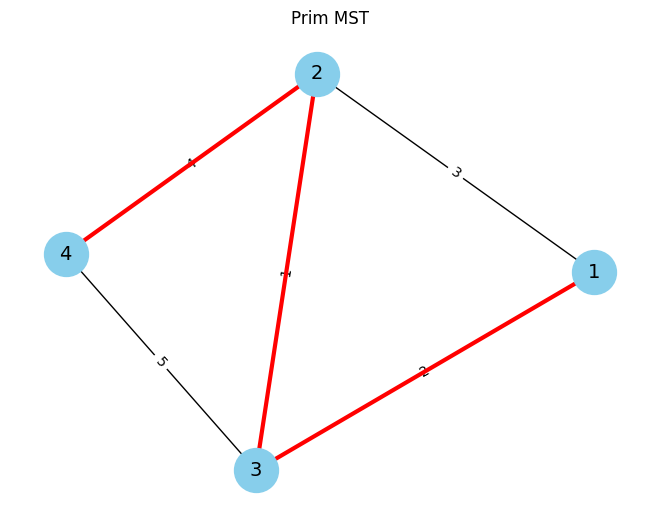


====== เลือกเมนู ======
1. แสดงกราฟทั้งหมด
2. DFS Spanning Tree
3. BFS Spanning Tree
4. Dijkstra Shortest Path
5. Prim Minimum Spanning Tree
6. Kruskal Minimum Spanning Tree
0. ออกจากโปรแกรม
Kruskal MST: [(2, 3, 1), (1, 3, 2), (2, 4, 4)]
👉 Total weight of Kruskal MST = 7


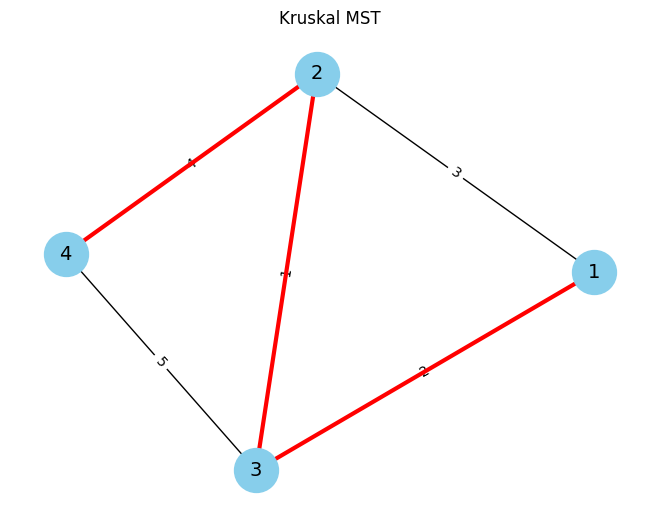


====== เลือกเมนู ======
1. แสดงกราฟทั้งหมด
2. DFS Spanning Tree
3. BFS Spanning Tree
4. Dijkstra Shortest Path
5. Prim Minimum Spanning Tree
6. Kruskal Minimum Spanning Tree
0. ออกจากโปรแกรม
ปิดโปรแกรมแล้วค่ะ!


In [3]:
from pyvis.network import Network
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import networkx as nx
import heapq
from collections import deque
import sys

# ---------- ฟังก์ชันแสดงกราฟ ----------
def display_graph(edges, highlight_edges=None, title="Graph"):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G, seed=42)
    weights = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, node_color='skyblue',
            node_size=1000, font_size=14)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)

    if highlight_edges:
        nx.draw_networkx_edges(G, pos, edgelist=highlight_edges,
                               width=3, edge_color='red')

    plt.title(title)
    plt.show()

# ---------- DFS ----------
def spanning_tree_dfs(N, adj, src):
    visited = [False] * (N+1)
    parent = [-1] * (N+1)
    tree_edges = []

    sys.setrecursionlimit(10000)

    def dfs(u):
        visited[u] = True
        for v, _ in adj[u]:
            if not visited[v]:
                parent[v] = u
                tree_edges.append((u, v))
                dfs(v)

    parent[src] = 0
    dfs(src)
    return parent, tree_edges

# ---------- BFS ----------
def spanning_tree_bfs(N, adj, src):
    visited = [False] * (N+1)
    parent = [-1] * (N+1)
    tree_edges = []
    q = deque([src])
    visited[src] = True

    while q:
        u = q.popleft()
        for v, _ in adj[u]:
            if not visited[v]:
                visited[v] = True
                parent[v] = u
                tree_edges.append((u, v))
                q.append(v)

    return parent, tree_edges

# ---------- Dijkstra ----------
def dijkstra(N, adj, start, end):
    dist = [float('inf')] * (N + 1)
    prev = [None] * (N + 1)
    dist[start] = 0
    pq = [(0, start)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in adj[u]:
            if dist[v] > dist[u] + w:
                dist[v] = dist[u] + w
                prev[v] = u
                heapq.heappush(pq, (dist[v], v))

    path = []
    v = end
    while v is not None:
        path.append(v)
        v = prev[v]
    path.reverse()

    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    return dist[end], path, path_edges

# ---------- Prim ----------
def prim_mst(N, edges):
    adj = [[] for _ in range(N+1)]
    for u, v, w in edges:
        adj[u].append((v, w))
        adj[v].append((u, w))

    visited = [False] * (N+1)
    mst = []
    pq = []

    visited[1] = True
    for v, w in adj[1]:
        heapq.heappush(pq, (w, 1, v))

    while pq and len(mst) < N - 1:
        w, u, v = heapq.heappop(pq)
        if visited[v]:
            continue
        visited[v] = True
        mst.append((u, v, w))

        for nxt, w2 in adj[v]:
            if not visited[nxt]:
                heapq.heappush(pq, (w2, v, nxt))

    return mst

# ---------- Kruskal ----------
def find(parent, x):
    if parent[x] != x:
        parent[x] = find(parent, parent[x])
    return parent[x]

def union(parent, rank, x, y):
    rx = find(parent, x)
    ry = find(parent, y)
    if rx != ry:
        if rank[rx] < rank[ry]:
            parent[rx] = ry
        elif rank[rx] > rank[ry]:
            parent[ry] = rx
        else:
            parent[ry] = rx
            rank[rx] += 1
        return True
    return False

def kruskal_mst(N, edges):
    parent = list(range(N+1))
    rank = [0] * (N+1)
    edges_sorted = sorted(edges, key=lambda x: x[2])
    mst = []

    for u, v, w in edges_sorted:
        if union(parent, rank, u, v):
            mst.append((u, v, w))
            if len(mst) == N - 1:
                break

    return mst


# ---------- Input ----------
N = int(input("กรอกจำนวนโหนด (N): "))
M = int(input("กรอกจำนวนเส้นเชื่อม (M): "))

edges = []
print("\nกรอกเส้นเชื่อมในรูปแบบ: u v w")
for i in range(M):
    u, v, w = map(int, input(f"เส้นเชื่อมที่ {i+1}: ").split())
    edges.append((u, v, w))

adj = [[] for _ in range(N + 1)]
for u, v, w in edges:
    adj[u].append((v, w))
    adj[v].append((u, w))

s = int(input("\nจุดเริ่มต้น (source): "))
t = int(input("จุดปลายทาง (target สำหรับ Dijkstra): "))

# ---------- เมนูหลัก ----------
while True:
    print("\n====== เลือกเมนู ======")
    print("1. แสดงกราฟทั้งหมด")
    print("2. DFS Spanning Tree")
    print("3. BFS Spanning Tree")
    print("4. Dijkstra Shortest Path")
    print("5. Prim Minimum Spanning Tree")
    print("6. Kruskal Minimum Spanning Tree")
    print("0. ออกจากโปรแกรม")

    choice = input("เลือกหมายเลข: ")

    if choice == "1":
        display_graph(edges, title="Original Graph")

    elif choice == "2":
        _, tree_dfs = spanning_tree_dfs(N, adj, s)
        print("DFS Tree:", tree_dfs)
        display_graph(edges, highlight_edges=tree_dfs, title="DFS Spanning Tree")

    elif choice == "3":
        _, tree_bfs = spanning_tree_bfs(N, adj, s)
        print("BFS Tree:", tree_bfs)
        display_graph(edges, highlight_edges=tree_bfs, title="BFS Spanning Tree")

    elif choice == "4":
        dist, path, path_edges = dijkstra(N, adj, s, t)
        print(f"\nShortest path {s} → {t} =", path)
        print("distance =", dist)
        display_graph(edges, highlight_edges=path_edges,
                      title="Dijkstra Shortest Path")

    elif choice == "5":
        prim_edges = prim_mst(N, edges)
        prim_highlight = [(u, v) for (u, v, w) in prim_edges]
        total_weight = sum(w for (_, _, w) in prim_edges)

        print("Prim MST:", prim_edges)
        print("👉 Total weight of Prim MST =", total_weight)

        display_graph(edges, highlight_edges=prim_highlight, title="Prim MST")

    elif choice == "6":
        kruskal_edges = kruskal_mst(N, edges)
        kruskal_highlight = [(u, v) for (u, v, w) in kruskal_edges]
        total_weight = sum(w for (_, _, w) in kruskal_edges)

        print("Kruskal MST:", kruskal_edges)
        print("👉 Total weight of Kruskal MST =", total_weight)

        display_graph(edges, highlight_edges=kruskal_highlight,
                      title="Kruskal MST")

    elif choice == "0":
        print("ปิดโปรแกรมแล้วค่ะ!")
        break

    else:
        print("❌ กรุณาเลือกหมายเลขที่ถูกต้อง")


In [2]:
import sys
!{sys.executable} -m pip install --upgrade nbformat


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
pip install ipykernel

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.
